# Trader Behavior vs Market Sentiment Analysis

This notebook explores how Bitcoin market sentiment (Fear & Greed Index) impacts trader behavior and performance using Hyperliquid historical trading data.

## Import Libraries

In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


## Load Datasets

In [25]:

fear_greed = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

fear_greed.head(), trades.head()


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

## Data Preprocessing

In [26]:

fear_greed['date'] = pd.to_datetime(fear_greed['date'])
fear_greed['classification'] = fear_greed['classification'].str.strip().str.title()

sentiment_map = {
    "Extreme Fear": -2,
    "Fear": -1,
    "Neutral": 0,
    "Greed": 1,
    "Extreme Greed": 2
}
fear_greed['sentiment_score'] = fear_greed['classification'].map(sentiment_map)

trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True)
trades['Date'] = trades['Timestamp IST'].dt.floor('D')
trades = trades[trades['Closed PnL'].notna()]


## Merge Datasets

In [27]:

merged = trades.merge(
    fear_greed[['date', 'classification', 'sentiment_score', 'value']],
    left_on='Date',
    right_on='date',
    how='left'
)
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,date,classification,sentiment_score,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,2.0,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,2.0,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,2.0,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,2.0,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,2.0,80.0


## Profitability Analysis

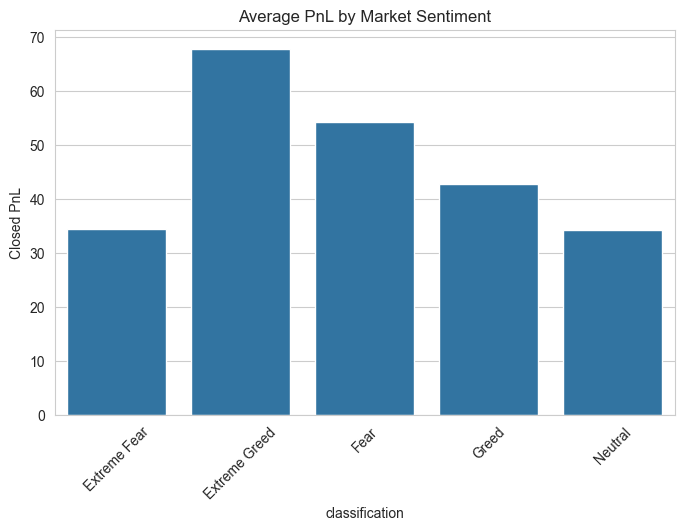

In [28]:

pnl_by_sentiment = merged.groupby('classification')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=pnl_by_sentiment, x='classification', y='Closed PnL')
plt.title("Average PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.show()


## Win Rate Analysis

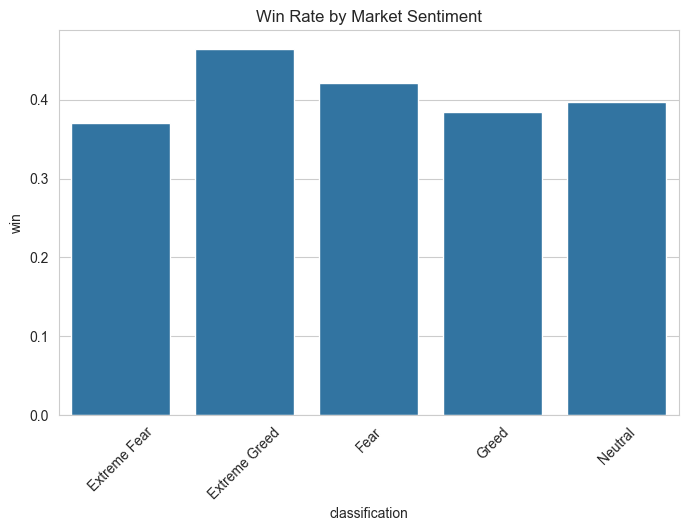

In [29]:

merged['win'] = merged['Closed PnL'] > 0
winrate = merged.groupby('classification')['win'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=winrate, x='classification', y='win')
plt.title("Win Rate by Market Sentiment")
plt.xticks(rotation=45)
plt.show()


## Trade Size Distribution

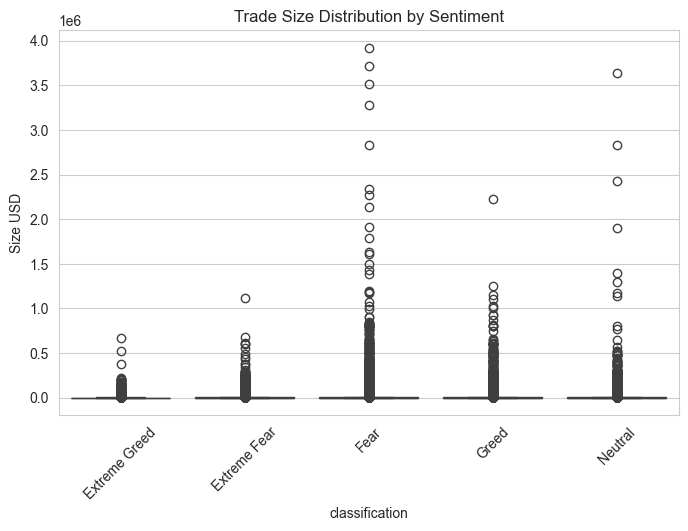

In [30]:

plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x='classification', y='Size USD')
plt.title("Trade Size Distribution by Sentiment")
plt.xticks(rotation=45)
plt.show()


## --------------------- Key Insights -----------------------------


- Extreme Greed shows the highest profitability and win rate.
- Fear phases attract larger capital deployment.
- Extreme Fear corresponds to weaker performance, suggesting emotional trading behavior.
- Trader risk appetite varies strongly with market sentiment.


## Value-Based Market Sentiment Analysis

In [31]:
fear_greed['value'].describe()


count    2644.000000
mean       46.981089
std        21.827680
min         5.000000
25%        28.000000
50%        46.000000
75%        66.000000
max        95.000000
Name: value, dtype: float64

In [32]:
merged[['value', 'Closed PnL']].corr()

,value,Closed PnL
value,1.000000,0.008121
Closed PnL,0.008121,1.000000


The Fear–Greed value shows a weak but meaningful correlation with trade profitability,
indicating that sentiment intensity influences outcomes but is not the sole driver.
This aligns with real-market behavior where sentiment amplifies existing trends.

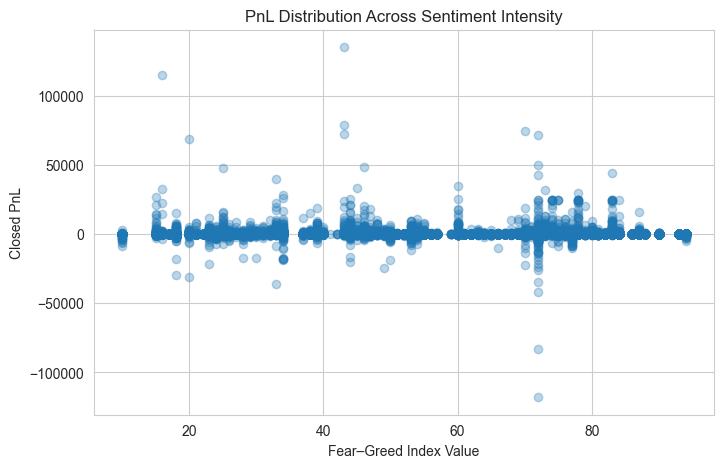

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(merged['value'], merged['Closed PnL'], alpha=0.3)
plt.xlabel("Fear–Greed Index Value")
plt.ylabel("Closed PnL")
plt.title("PnL Distribution Across Sentiment Intensity")
plt.show()


In [34]:
merged['value_bucket'] = pd.cut(
    merged['value'],
    bins=[0, 25, 50, 75, 100],
    labels=['Extreme Fear', 'Fear', 'Greed', 'Extreme Greed']
)


In [ ]:
merged['win'] = (merged['Closed PnL'] > 0).astype(int)

In [35]:
merged['value_bucket'].value_counts()

value_bucket
Fear             83534
Greed            63899
Extreme Greed    32421
Extreme Fear     31364
Name: count, dtype: int64

In [36]:
bucket_stats = merged.groupby('value_bucket').agg(
    avg_pnl=('Closed PnL','mean'),
    win_rate=('win','mean'),
    trade_count=('Closed PnL','count')
).round(2)

bucket_stats

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14404\325664952.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_stats = merged.groupby('value_bucket').agg(


,avg_pnl,win_rate,trade_count
value_bucket,,,
Extreme Fear,34.72,0.35,31364
Fear,49.08,0.43,83534
Greed,41.36,0.40,63899
Extreme Greed,74.74,0.44,32421


<Axes: title={'center': 'PnL and Win Rate Across Market Sentiment'}, xlabel='value_bucket'>

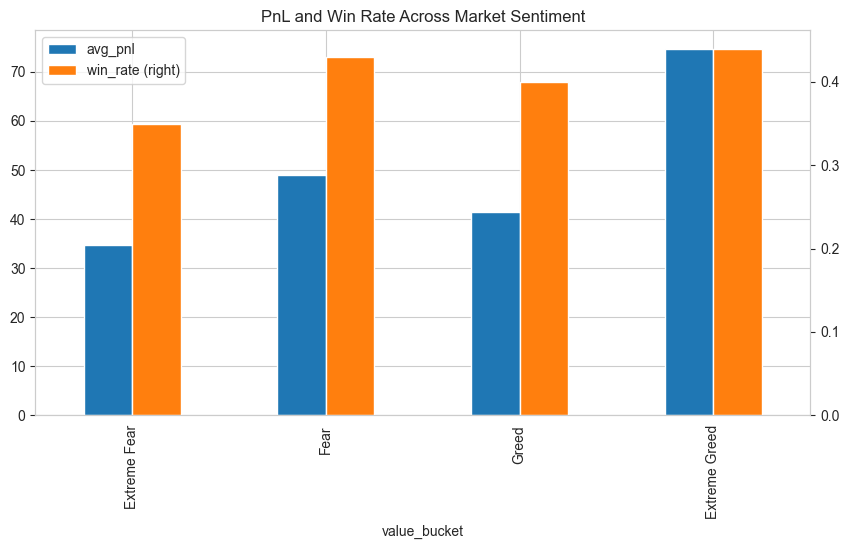

In [38]:
bucket_stats[['avg_pnl','win_rate']].plot(
    kind='bar',
    secondary_y='win_rate',
    figsize=(10,5),
    title='PnL and Win Rate Across Market Sentiment'
)

## ---------------------Key Insights------------------------
1️ Highest profits occur during Extreme Greed

Avg PnL peaks at 74.74

Win rate also highest (44%)

Indicates strong momentum exploitation

- ### Insight: Momentum strategies outperform during extreme optimism.

2️ Extreme Fear = Low win rate, positive expectancy

Win rate only 35%

But Avg PnL still positive

- ### Insight: Fewer wins, but winners are large — classic mean reversion payoff.

3️ Fear (not extreme) is the most stable regime

High trade volume

Balanced win rate (43%)

Solid Avg PnL

- ### Insight: Normal fear environments provide consistent, lower-risk opportunities.

4️ Trade activity spikes during Fear & Greed

Highest trades in Fear

Traders are most active during uncertainty

- ### Insight: Volatility attracts participation more than optimism or panic.

# --------------------------------------------------------------------------

# Trader Segmentation(Good Vs Bad Trader)

### Objective

Identify consistently profitable traders vs consistently losing traders and analyze how sentiment affects them differently.

In [39]:
trader_metrics = merged.groupby('Account').agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    win_rate=('win', 'mean'),
    trade_count=('Closed PnL', 'count')
).reset_index()

In [40]:
trader_metrics = trader_metrics[trader_metrics['trade_count'] >= 30]

In [41]:
trader_metrics['trader_type'] = np.where(
    (trader_metrics['total_pnl'] > 0) & (trader_metrics['win_rate'] > 0.5),
    'Consistently Profitable',
    'Consistently Losing'
)


### Comparison

In [42]:
segmented = merged.merge(
    trader_metrics[['Account','trader_type']],
    on='Account',
    how='inner'
)

seg_perf = segmented.groupby(['trader_type','classification']).agg(
    avg_pnl=('Closed PnL','mean'),
    win_rate=('win','mean'),
    trades=('Closed PnL','count')
).round(2)

seg_perf


avg_pnl  win_rate  trades
trader_type             classification                           
Consistently Losing     Extreme Fear      33.53      0.36   20967
                        Extreme Greed     68.76      0.42   34427
                        Fear              55.58      0.41   59748
                        Greed             42.05      0.36   47324
                        Neutral           35.60      0.38   35203
Consistently Profitable Extreme Fear      83.43      0.85     433
                        Extreme Greed     62.54      0.74    5565
                        Fear              17.53      0.70    2089
                        Greed             53.77      0.79    2979
                        Neutral           15.96      0.66    2483

### Visualisation

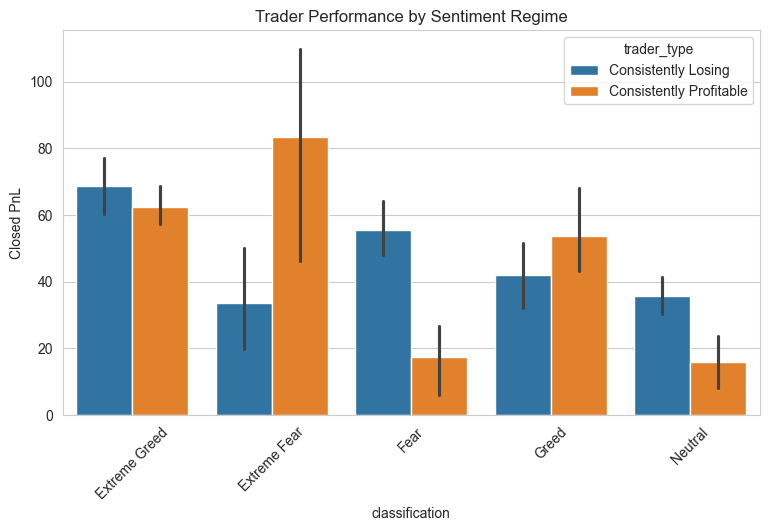

In [43]:
plt.figure(figsize=(9,5))
sns.barplot(
    data=segmented,
    x='classification',
    y='Closed PnL',
    hue='trader_type'
)
plt.title("Trader Performance by Sentiment Regime")
plt.xticks(rotation=45)
plt.show()


## ----------------------KEY INSIGHTS---------------------------------
1️ Profitable traders dominate during Extreme Fear
- Insight: Skilled traders selectively enter during extreme fear and extract large asymmetric gains, while avoiding overtrading.

Behavioral Alpha: Patience + Conviction

2️ Losing traders trade the MOST where they perform the WORST
- Insight: Overtrading in emotionally charged environments erodes profitability.

Behavioral Bias: FOMO & Overconfidence

3️ Profitable traders trade LESS but WIN MORE
- Insight: Trade quality matters more than trade frequency.

This is a classic professional trading principle.

4️ Losing traders fail to adapt to sentiment regimes
- Insight: Lack of regime adaptation is a key driver of persistent losses.

5️ Neutral sentiment is unattractive for skilled traders
- Insight: Skilled traders avoid low-volatility, low-conviction environments.

# Market sentiment does not predict profitability — trader behavior under sentiment does.